In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('energydata_complete.csv')

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
simple_linear_reg_df = data[['T2', 'T6']]

<AxesSubplot:xlabel='T2', ylabel='T6'>

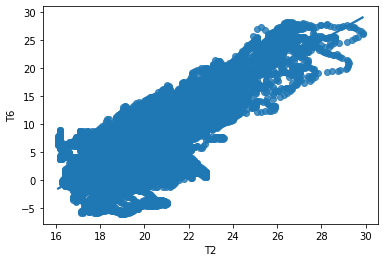

In [5]:
sns.regplot(x="T2", y="T6",data=simple_linear_reg_df)

In [6]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
features = data.drop(columns=['date', 'lights'])
target = data['Appliances']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaler.fit(features)

MinMaxScaler()

In [13]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size=0.3, random_state=42)

In [19]:
x_train

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,50,21.500000,35.626667,17.790000,40.590000,21.700000,35.26,20.39,33.863333,19.600000,...,19.463333,38.260000,0.250000,766.400000,83.000000,2.000000,65.000000,-2.350000,36.226675,36.226675
2453,30,19.500000,44.560000,18.700000,44.290000,19.823333,44.50,18.10,43.860000,17.200000,...,17.200000,46.163333,3.166667,765.266667,85.333333,2.000000,40.000000,0.966667,43.199767,43.199767
9152,40,20.790000,35.400000,16.890000,42.030000,21.700000,36.00,19.70,33.200000,19.290000,...,19.390000,39.067500,-1.566667,766.000000,89.333333,1.333333,60.666667,-3.100000,24.976055,24.976055
12694,120,22.100000,43.260000,19.963333,45.500000,23.390000,39.79,21.10,39.060000,20.660000,...,20.290000,37.400000,8.833333,753.366667,81.000000,1.666667,26.000000,5.733333,16.161125,16.161125
16952,50,24.700000,42.360000,29.856667,31.790000,26.171429,38.59,25.10,39.760000,23.166667,...,23.100000,44.466667,21.433333,752.100000,51.000000,2.000000,40.000000,10.800000,17.055346,17.055346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,60,21.760000,40.900000,19.390000,43.090000,23.000000,39.00,21.50,39.790000,20.100000,...,20.356667,40.560000,9.566667,750.466667,77.666667,6.666667,40.000000,5.833333,45.513197,45.513197
11964,120,22.390000,43.700000,22.000000,42.066667,22.700000,41.23,21.29,44.120000,19.700000,...,20.290000,44.290000,17.300000,749.500000,66.000000,2.000000,40.000000,10.900000,34.934752,34.934752
5390,30,20.290000,35.700000,18.200000,37.590000,20.100000,37.59,18.20,35.290000,18.500000,...,17.890000,39.466667,-1.066667,754.900000,87.000000,3.666667,62.666667,-2.933333,19.071358,19.071358
860,80,21.790000,35.560000,20.434000,35.116000,21.200000,36.90,21.10,35.663333,18.050000,...,18.500000,41.466667,2.066667,765.033333,64.333333,1.333333,40.000000,-4.066667,1.050592,1.050592


In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [21]:
predicted_values 

array([ 40.,  90.,  50., ...,  50., 110.,  50.])

In [22]:
y_test

8980      40
2754      90
9132      50
14359     50
8875      70
        ... 
831      250
10993     60
11761     50
12364    110
11863     50
Name: Appliances, Length: 5921, dtype: int64

In [16]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.0

In [17]:
#Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

0.0

In [18]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.0

In [30]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [31]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [32]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [34]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [35]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,T2,-5.186551e-15,-5.865832e-08,0.0
1,T3,-3.954948e-15,8.251221e-08,0.0
2,RH_2,-2.366776e-15,-4.388023e-08,-0.0
3,T7,-1.370106e-15,3.319286e-09,0.0
4,T4,-9.445960e-16,8.919040e-09,0.0
5,T5,-6.582627e-16,-5.116834e-09,0.0
6,T6,-5.488830e-16,2.351485e-08,0.0
7,RH_8,-4.171321e-16,-1.845677e-08,-0.0
8,RH_4,-3.075422e-16,3.847447e-09,0.0
9,Tdewpoint,-2.069825e-16,1.820104e-08,0.0
